In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#install simpletransformers library
pip install simpletransformers

In [ ]:
import torch 
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score, accuracy_score
from simpletransformers.classification import ClassificationModel


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
#Data
train="drive/My Drive/Dataset/Train.txt"
dev="drive/My Drive/Dataset/Dev.txt"
test="drive/My Drive/Dataset/Test.txt"
covid="drive/My Drive/Dataset/covid19-spans.txt"

In [ ]:
covid="drive/My Drive/Dataset/covid19-spans.txt"
covid_data=pd.read_table(covid, sep='\t')
covid_x=covid_data['covid19_span']

In [ ]:
train_data = pd.read_table(train, sep='\t')
dev_data=pd.read_table(dev, sep='\t')
test_data=pd.read_table(test, sep='\t')
covid_data=pd.read_table(covid, sep='\t')

In [ ]:
train_data.drop(train_data.loc[train_data['label']=='Repetition'].index, inplace=True)
train_data.drop(train_data.loc[train_data['label']=='Bandwagon'].index, inplace=True)
train_data.drop(train_data.loc[train_data['label']=='Straw_Men'].index, inplace=True)
train_data.drop(train_data.loc[train_data['label']=='Whataboutism'].index, inplace=True)
train_data.drop(train_data.loc[train_data['label']=='Reductio_ad_hitlerum'].index, inplace=True)
train_data.drop(train_data.loc[train_data['label']=='Red_Herring'].index, inplace=True)
train_data.drop(train_data.loc[train_data['label']=='Obfuscation,Intentional_Vagueness,Confusion'].index, inplace=True)
train_data.drop(train_data.loc[train_data['label']=='Thought-terminating_Cliches'].index, inplace=True)

In [ ]:
dev_data.drop(dev_data.loc[dev_data['label']=='Repetition'].index,inplace=True)
dev_data.drop(dev_data.loc[dev_data['label']=='Bandwagon'].index,inplace=True)
dev_data.drop(dev_data.loc[dev_data['label']=='Straw_Men'].index,inplace=True)
dev_data.drop(dev_data.loc[dev_data['label']=='Whataboutism'].index,inplace=True)
dev_data.drop(dev_data.loc[dev_data['label']=='Reductio_ad_hitlerum'].index,inplace=True)
dev_data.drop(dev_data.loc[dev_data['label']=='Red_Herring'].index,inplace=True)
dev_data.drop(dev_data.loc[dev_data['label']=='Obfuscation,Intentional_Vagueness,Confusion'].index,inplace=True)
dev_data.drop(dev_data.loc[dev_data['label']=='Thought-terminating_Cliches'].index,inplace=True)

In [ ]:
test_data.drop(test_data.loc[test_data['label']=='Repetition'].index,inplace=True)
test_data.drop(test_data.loc[test_data['label']=='Bandwagon'].index,inplace=True)
test_data.drop(test_data.loc[test_data['label']=='Straw_Men'].index,inplace=True)
test_data.drop(test_data.loc[test_data['label']=='Whataboutism'].index,inplace=True)
test_data.drop(test_data.loc[test_data['label']=='Reductio_ad_hitlerum'].index,inplace=True)
test_data.drop(test_data.loc[test_data['label']=='Red_Herring'].index,inplace=True)
test_data.drop(test_data.loc[test_data['label']=='Thought-terminating_Cliches'].index,inplace=True)
test_data.drop(test_data.loc[test_data['label']=='Obfuscation,Intentional_Vagueness,Confusion'].index,inplace=True)

In [ ]:
#Labels encoding
le1 = preprocessing.LabelEncoder()
le1.fit(train_data.label)
train_data['labels'] = le1.transform(train_data.label)


le2 = preprocessing.LabelEncoder()
le2.fit(dev_data.label)
dev_data['labels']=le2.transform(dev_data.label)

In [ ]:
le3= preprocessing.LabelEncoder()
le3.fit(test_data.label)
test_data['labels']=le3.transform(test_data.label)

In [ ]:
merged=pd.concat([train_data,dev_data])

In [ ]:
train,dev=train_test_split(merged,test_size=0.2)

In [ ]:
train=train[['Arabic','labels']]

In [ ]:
dev=dev_data[['Arabic','labels']]

In [ ]:
test=test_data[['Arabic','labels']]

In [ ]:
arg = {

    'max_seq_length': 200,
    'num_train_epochs': 2,
    'train_batch_size': 32,
    'eval_batch_size':32,
    'gradient_accumulation_steps': 1,
    'learning_rate':5e-5,
    "fp16": True,
    "fp16_opt_level": "O2",
    'save_steps': 10000,
     'warmup_ratio':0.08,
    'evaluate_during_training': True,
    'evaluate_during_training_steps': 1000,
    'reprocess_input_data': True,
    "save_model_every_epoch": False,
    'overwrite_output_dir': True,
    'no_cache': True,
    'use_early_stopping': True,
    'early_stopping_patience': 2,
    'manual_seed': 100,
}


model =  ClassificationModel('bert', 'aubmindlab/bert-base-arabertv01', use_cuda=True, num_labels=14, args=arg)

Some weights of the model checkpoint at aubmindlab/bert-base-arabertv01 were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification wer

In [ ]:
hist=model.train_model(train, show_running_loss=True,verbose=True,eval_df=test)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:446: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/131 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.



Running Epoch 1 of 2:   0%|          | 0/131 [00:00<?, ?it/s]

##Evaluation

In [ ]:
def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(test, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.



Running Evaluation:   0%|          | 0/37 [00:00<?, ?it/s]

In [ ]:
predictions, raw_outputs = model.predict(test_data['Arabic'])

  0%|          | 0/37 [00:00<?, ?it/s]

In [ ]:
pred_label=[]
for i in range(len(predictions)):
  pred_label.append(np.argmax(raw_outputs[i]))

In [ ]:
index2label=['Appeal_to_Authority',
'Appeal_to_fear-prejudice',
'Black-and-White_Fallacy',
'Causal_Oversimplification',
'Doubt',
'Exaggeration,Minimisation',
'Flag-Waving',
'Loaded_Language',
'Name_Calling,Labeling',
'Slogans'
]


results = []
for i in range(len(predictions3)):
  results.append(index2label[predictions3[i]])

In [ ]:
res=pd.DataFrame(results)

In [ ]:
o=res.rename(columns = {0: 'Label'},inplace = False)

In [ ]:
o.value_counts()

Label                    
Appeal_to_fear-prejudice     57
Exaggeration,Minimisation    40
Doubt                        35
Loaded_Language              18
Name_Calling,Labeling         6
Causal_Oversimplification     3
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn import metrics
act_y=test_data['label']


print("Micro f1 :",f1_score(act_y, results, average='micro'))
print("Accuracy is:",accuracy_score(act_y,results))
print(metrics.classification_report(act_y, results))

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

def cm(true, pred):
    cm = confusion_matrix(true, pred)
    print(cm)
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True,cmap="YlGnBu",)
    #cf_rep = classification_report(true, pred)

In [ ]:
cm(act_y,results)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn import metrics
act_y=test_data['label']


print("Micro f1 :",f1_score(act_y, results, average='micro'))
print("Accuracy is:",accuracy_score(act_y,results))
print(metrics.classification_report(act_y, results))

Micro f1 : 0.6150556030795552
Accuracy is: 0.6150556030795552
                           precision    recall  f1-score   support

      Appeal_to_Authority       0.13      0.04      0.06        53
 Appeal_to_fear-prejudice       0.53      0.45      0.49       128
  Black-and-White_Fallacy       0.33      0.12      0.18        25
Causal_Oversimplification       0.25      0.25      0.25        32
                    Doubt       0.47      0.57      0.52        72
Exaggeration,Minimisation       0.38      0.53      0.45        92
              Flag-Waving       0.76      0.66      0.70        90
          Loaded_Language       0.72      0.83      0.77       432
    Name_Calling,Labeling       0.71      0.62      0.66       209
                  Slogans       0.40      0.33      0.36        36

                 accuracy                           0.62      1169
                macro avg       0.47      0.44      0.44      1169
             weighted avg       0.60      0.62      0.60      116

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn import metrics
act_y=test_data['label']


print("Micro f1 :",f1_score(act_y, results, average='micro'))
print("Accuracy is:",accuracy_score(act_y,results))
print(metrics.classification_report(act_y, results))

Micro f1 : 0.6056458511548332
Accuracy is: 0.6056458511548332
                           precision    recall  f1-score   support

      Appeal_to_Authority       0.20      0.06      0.09        53
 Appeal_to_fear-prejudice       0.55      0.47      0.51       128
  Black-and-White_Fallacy       0.08      0.04      0.05        25
Causal_Oversimplification       0.29      0.31      0.30        32
                    Doubt       0.47      0.53      0.50        72
Exaggeration,Minimisation       0.36      0.47      0.41        92
              Flag-Waving       0.79      0.61      0.69        90
          Loaded_Language       0.70      0.84      0.76       432
    Name_Calling,Labeling       0.68      0.60      0.64       209
                  Slogans       0.34      0.28      0.31        36

                 accuracy                           0.61      1169
                macro avg       0.45      0.42      0.43      1169
             weighted avg       0.59      0.61      0.59      116

##Covid-19 Predictions

In [ ]:
predictions, raw_outputs = model.predict(covid_x)

In [ ]:
pred_label=[]
for i in range(len(predictions)):
  pred_label.append(np.argmax(raw_outputs[i]))

In [ ]:
index2label=['Appeal_to_Authority',
'Appeal_to_fear-prejudice',
'Black-and-White_Fallacy',
'Causal_Oversimplification',
'Doubt',
'Exaggeration,Minimisation',
'Flag-Waving',
'Loaded_Language',
'Name_Calling,Labeling',
'Slogans'
]


results = []
for i in range(len(predictions)):
  results.append(index2label[predictions3[i]])

In [ ]:
res=pd.DataFrame(results)

In [ ]:
o=res.rename(columns = {0: 'Label'},inplace = False)

In [ ]:
o.value_counts()

Label                    
Loaded_Language              65
Appeal_to_fear-prejudice     34
Exaggeration,Minimisation    23
Doubt                        10
Causal_Oversimplification     9
Slogans                       5
Name_Calling,Labeling         5
Flag-Waving                   5
Appeal_to_Authority           2
Black-and-White_Fallacy       1
dtype: int64

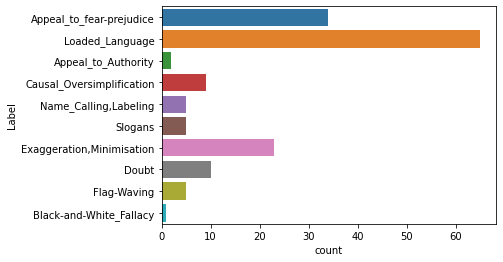

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=o,y='Label',hu)
plt.show()

In [ ]:
for i in range(len(covid_x)):
  print(covid_x[i],"\t \t",results[i])

وحذر الوزير الفرنسي عبر تغريدة على حسابه على تويتر مساء السبت من أن تناول مثل تلك المضادات قد يفاقم حالة المصاب بكوفيد 19 	 	 Appeal_to_fear-prejudice
قد يفاقم حالة المصاب بكوفيد19 	 	 Appeal_to_fear-prejudice
كما أوضح أن استخدام الإيبوبروفن والعقاقير المضادة للالتهابات المماثلة، يمكن أن يكون عاملاً يزيد من خطورة عدوى كوفيد-19. وكتب "في حالة الإصابة بالحمى، تناولوا الباراسيتامول 	 	 Loaded_Language
في حالة الإصابة بالحمى، تناولوا الباراسيتامولقال فيليب إنه لم يعد أمام الحكومة أي خيار سوى اتخاذ هذا القرار لأن الكثير من الناس لا يزالون في الشارع ولا يطبقون بشكل فعال الإجراءات المعلنة حديثا بما يسرع من وتيرة انتشار الفيروسوتيرة انتشار الفيروس 	 	 Appeal_to_fear-prejudice
يتمثل التهديد في حالات الإصابة الجديدة القادمة من خارج الصين 	 	 Appeal_to_fear-prejudice
بينما تواصل البلاد إبطاء انتشار الفيروس في الداخل بعدما أعلنت أكثر من 100 دولة رصد حالات إصابة بالمرض. 	 	 Appeal_to_fear-prejudice
بتشديد عمليات فحص الوافدين من الخارج إلى مطار بكينبعدما تخطى عدد حالات الإصابة بفيروس كورونا القادمة 

##2 Epohcs

In [ ]:
arg = {

    'max_seq_length': 200,
    'num_train_epochs': 2,
    'train_batch_size': 32,
    'eval_batch_size': 32,
    'gradient_accumulation_steps': 1,
    'learning_rate':4e-5,
    "fp16": True,
    "fp16_opt_level": "O2",
    'save_steps': 10000,
     'warmup_ratio':0.06,
    'evaluate_during_training': True,
    'evaluate_during_training_steps': 1000,
    'reprocess_input_data': True,
    "save_model_every_epoch": False,
    'overwrite_output_dir': True,
    'no_cache': True,
    'use_early_stopping': True,
    'early_stopping_patience': 2,
    'manual_seed': 1000,
}


model =  ClassificationModel('bert', 'aubmindlab/bert-base-arabertv01', use_cuda=True, num_labels=14, args=arg)

Some weights of the model checkpoint at aubmindlab/bert-base-arabertv01 were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification wer

In [ ]:
hist=model.train_model(train, show_running_loss=True,verbose=True,eval_df=test)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:395: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:975: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [ ]:
hist

(326,
 {'eval_loss': [1.391679262792742, 1.2999616080039256],
  'global_step': [163, 326],
  'mcc': [0.4350188500311279, 0.4789841163664296],
  'train_loss': [1.006686806678772, 1.0404925346374512]})

In [ ]:
hist

(326,
 {'eval_loss': [1.3930540310369957, 1.3256167117002848],
  'global_step': [163, 326],
  'mcc': [0.41215333868977694, 0.4930223704755407],
  'train_loss': [1.016140341758728, 0.6901285648345947]})

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(test, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:975: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [ ]:
len(wrong_predictions)

476

In [ ]:
result

{'acc': 0.592814371257485,
 'eval_loss': 1.2999616080039256,
 'f1': 0.592814371257485,
 'mcc': 0.4789841163664296}

#3 Epochs

In [ ]:
arg = {

    'max_seq_length': 200,
    'num_train_epochs': 2,
    'train_batch_size': 32,
    'eval_batch_size': 32,
    'gradient_accumulation_steps': 1,
    'learning_rate':4e-5,
    "fp16": True,
    "fp16_opt_level": "O2",
    'save_steps': 10000,
     'warmup_ratio':0.06,
    'evaluate_during_training': True,
    'evaluate_during_training_steps': 1000,
    'reprocess_input_data': True,
    "save_model_every_epoch": False,
    'overwrite_output_dir': True,
    'no_cache': True,
    'use_early_stopping': True,
    'early_stopping_patience': 2,
    'manual_seed': 1000,
}


model1 =  ClassificationModel('bert', 'aubmindlab/bert-base-arabertv01', use_cuda=True, num_labels=14, args=arg)

Some weights of the model checkpoint at aubmindlab/bert-base-arabertv01 were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification wer

In [ ]:
hist=model1.train_model(train, show_running_loss=True,verbose=True,eval_df=test)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:446: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/163 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.



Running Epoch 1 of 2:   0%|          | 0/163 [00:00<?, ?it/s]

In [ ]:
hist

(326,
 {'eval_loss': [1.3857364622322288, 1.3000955033946682],
  'global_step': [163, 326],
  'mcc': [0.4250182246039779, 0.4698856937677417],
  'train_loss': [1.0359067916870117, 0.9533067941665649]})

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model1.eval_model(test, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning:

Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.



Running Evaluation:   0%|          | 0/37 [00:00<?, ?it/s]

In [ ]:
len(wrong_predictions)

487

In [ ]:

result

{'acc': 0.583404619332763,
 'eval_loss': 1.3000955033946682,
 'f1': 0.583404619332763,
 'mcc': 0.4698856937677417}

In [ ]:
train_loss_values=[1.3618756532669067, 0.8951525092124939]
val_loss_values=[1.5686661311098047, 1.4660761517447394]

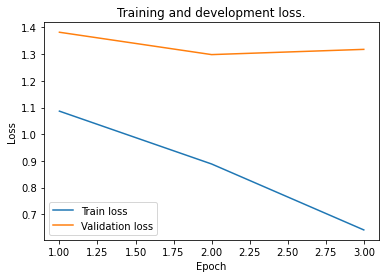

In [ ]:
import matplotlib.pyplot as plt
# line 1 points
x1 = [1,2,3]
train_loss_values=[1.0864945650100708, 0.8885036706924438, 0.6414310932159424]
# plotting the line 1 points 
plt.plot(x1, train_loss_values, label = "Train loss")
# line 2 points

val_loss_values=[1.3821866238439404, 1.2983913912966445, 1.3180051011008185]
# plotting the line 2 points 
plt.plot(x1, val_loss_values, label = "Validation loss")
plt.xlabel('Epoch')
# Set the y axis label of the current axis.
plt.ylabel('Loss')
# Set a title of the current axes.
plt.title('Training and development loss.')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
import plotly.express as px
f = pd.DataFrame(train_loss_values)
f.columns=['Loss']
l= pd.DataFrame(val_loss_values)
l.columns=['Loss']
fig = px.line(f, x=f.index, y=f.Loss)
#fig = px.line(l, x=f.index, y=l.Loss)
fig.update_layout(title='Training loss of the Model',
                   xaxis_title='Epoch',
                   yaxis_title='Loss')
fig.show()

###blabla

In [ ]:
from statistics import mode 
final_pred = []
for i in range(0,len(test_data['span'])):
    print(predictions[i])
    final_pred.append(predictions[i]*0.5+ predictions2[i]*0.2+predictions3[i]*0.6)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
def report(true, pred):
    cm = confusion_matrix(true, pred)
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True)
    #cf_rep = classification_report(true, pred)
    #print(cf_rep)

act_y=dev_data['label']

print("Micro f1 :",f1_score(act_y, results, average='micro'))
print("Accuracy is:",accuracy_score(act_y,results))
print(metrics.classification_report(act_y, results))
report(act_y,results)

Micro f1 : 0.5945437441204139
Accuracy is: 0.5945437441204139
                                    precision    recall  f1-score   support

               Appeal_to_Authority       0.12      0.14      0.13        14
          Appeal_to_fear-prejudice       0.30      0.39      0.34        44
    Bandwagon,Reductio_ad_hitlerum       0.40      0.40      0.40         5
           Black-and-White_Fallacy       0.25      0.14      0.18        22
         Causal_Oversimplification       0.33      0.33      0.33        18
                             Doubt       0.57      0.59      0.58        66
         Exaggeration,Minimisation       0.45      0.57      0.50        68
                       Flag-Waving       0.73      0.75      0.74        87
                   Loaded_Language       0.75      0.78      0.76       325
             Name_Calling,Labeling       0.66      0.73      0.70       183
                        Repetition       0.41      0.30      0.35       145
                         

TypeError: ignored

In [ ]:
def report(true, pred):
    cm = confusion_matrix(true, pred)
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True)
    cf_rep = classification_report(true, pred)
    print(cf_rep)

In [ ]:
from sklearn.model_selection import KFold
def Stacking(model,train,test):
   kf = KFold(n_splits=3, random_state=1, shuffle=True)
   scores=[]
   X_train=train['span']
   Y_train=train['labels']
   test_text=test['span']
   
   test_pred=list((test.shape[0],1))
   train_pred=list((0,1))
   for k , (train_indices,val_indices) in enumerate(kf.split(X_train,Y_train)):
      print("Running fold {} / {}".format(k + 1, 3))
      print("TRAIN:", train_indices, "TEST:", val_indices)
      x_train,x_val=X_train.iloc[train_indices],Y_train.iloc[val_indices]
      y_train,y_val=Y_train.iloc[train_indices],Y_train.iloc[val_indices]
      XX={'span':x_train,'label':y_train}
      VV={'span':x_val,'label':y_val}
      train=pd.DataFrame(XX)
      
      dev=pd.DataFrame(VV)
      
      model.train_model(train,eval_df=dev)
      print('OLAA')
      #train_pred.append(model.predict(x_val))
      test_pred.append(model.predict(test_text))

   return train_pred,test_pred
train_pred1,test_pred1=Stacking(model1,train,test_data)
df = pd.concat([train_pred1, test_pred1], axis=1)
#df_test = pd.concat([test_pred1, test_pred2], axis=1)


In [ ]:
for i in range(len(raw_outputs)):
   raw_outputs[i][0]=raw_outputs[i][0]*0.23
   raw_outputs[i][1]=raw_outputs[i][1]*0.047
   raw_outputs[i][2]=raw_outputs[i][2]*0.50
   raw_outputs[i][3]=raw_outputs[i][3]*0.40
   raw_outputs[i][4]=raw_outputs[i][4]*0.034
   raw_outputs[i][5]=raw_outputs[i][5]*0.08
   raw_outputs[i][6]=raw_outputs[i][6]*0.076
   raw_outputs[i][7]=raw_outputs[i][7]*0.037
   raw_outputs[i][8]=raw_outputs[i][8]*0.34
   raw_outputs[i][9]=raw_outputs[i][9]*0.17
   raw_outputs[i][10]=raw_outputs[i][10]*0.10
   raw_outputs[i][11]=raw_outputs[i][11]*0.30
   raw_outputs[i][12]=raw_outputs[i][12]*0.35
   raw_outputs[i][13]=raw_outputs[i][13]*0.20

In [ ]:
arg = {

    'max_seq_length': 200,
    'num_train_epochs': 4,
    'train_batch_size': 32,
    'eval_batch_size': 32,
    'gradient_accumulation_steps': 1,
    'learning_rate':4e-5,
    "fp16": True,
    "fp16_opt_level": "O2",
    'save_steps': 10000,
     'warmup_ratio':0.06,
    'evaluate_during_training': True,
    'evaluate_during_training_steps': 1000,
    'reprocess_input_data': True,
    "save_model_every_epoch": False,
    'overwrite_output_dir': True,
    'no_cache': True,
    'use_early_stopping': True,
    'early_stopping_patience': 2,
    'manual_seed': 1000,
}


model =  ClassificationModel('bert', 'aubmindlab/bert-base-arabertv01', use_cuda=True, num_labels=14, args=arg)